# DataCL - Exploration Notebook

Este notebook demuestra el uso del módulo de análisis para explorar el dataset de exportaciones.

## Módulos disponibles:
- **loader**: Carga de datos con schema enforcement
- **kpis**: Cálculo de KPIs globales y por dimensión
- **top_n**: Rankings Top N por diferentes dimensiones
- **filters**: Funciones de filtrado
- **timeseries**: Análisis de series temporales


In [1]:
import sys
from pathlib import Path

# Agregar el directorio raíz al path para importar el módulo analysis
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

from analysis import (
    load_data,
    get_years,
    get_countries,
    get_products,
    get_exporters,
    get_total_boxes,
    get_total_kilos,
    get_total_rows,
    top_products,
    top_countries,
    top_exporters,
    filter_by_year,
    time_series_total,
)

# Cargar datos
df = load_data()
print(f"Dataset cargado: {len(df):,} filas, {len(df.columns)} columnas")
print(f"\nColumnas: {df.columns}")
print(f"\nPrimeras filas:")
df.head()


Dataset cargado: 1,754,553 filas, 9 columnas

Columnas: ['season', 'week', 'year', 'country', 'product', 'exporter', 'port_destination', 'boxes', 'net_weight_kg']

Primeras filas:


season,week,year,country,product,exporter,port_destination,boxes,net_weight_kg
str,i64,i64,str,str,str,str,i64,f64
"""2010-2011""",35,2010,"""CANADA""","""Kiwifruit""","""Copefrut S.A.""","""Toronto""",2240,22400.0
"""2010-2011""",35,2010,"""CANADA""","""Mandarins""","""Desarr.Agrario""","""Vancouver""",4200,63000.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Exp.Subsole""","""Toronto""",2920,43800.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Lo Garces Ltda.""","""Toronto""",4226,63390.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Lo Garces Ltda.""","""Toronto""",54,810.0


## 2. KPIs Globales


In [2]:
# Calcular KPIs globales
total_boxes = get_total_boxes(df)
total_kilos = get_total_kilos(df)
total_rows = get_total_rows(df)
total_countries = df["country"].n_unique()
total_products = df["product"].n_unique()
total_exporters = df["exporter"].n_unique()

print("=" * 60)
print("KPIs GLOBALES")
print("=" * 60)
print(f"Total de filas: {total_rows:,}")
print(f"Total de cajas: {total_boxes:,}")
print(f"Total de kilos: {total_kilos:,.2f}")
print(f"Países únicos: {total_countries}")
print(f"Productos únicos: {total_products}")
print(f"Exportadores únicos: {total_exporters}")


KPIs GLOBALES
Total de filas: 1,754,553
Total de cajas: 4,438,150,689
Total de kilos: 38,662,724,790.00
Países únicos: 137
Productos únicos: 60
Exportadores únicos: 2643


## 3. Valores únicos disponibles


In [3]:
# Obtener valores únicos
years = get_years()
countries = get_countries()
products = get_products()
exporters = get_exporters()

print(f"Años disponibles: {min(years)} - {max(years)} ({len(years)} años)")
print(f"\nPrimeros 10 países: {countries[:10]}")
print(f"\nPrimeros 10 productos: {products[:10]}")
print(f"\nPrimeros 10 exportadores: {exporters[:10]}")


Años disponibles: 2010 - 2025 (16 años)

Primeros 10 países: ['AFGHANISTAN', 'ALBANIA', 'ANGOLA', 'ARGELIA', 'ARGENTINA', 'ARMENIA', 'ARUBA', 'AUSTRALIA', 'AUSTRIA', 'AZERBAIYAN']

Primeros 10 productos: ['Almonds', 'Apples', 'Apricot', 'Avocados', 'Baby Kiwi', 'Blackberries', 'Blueberries', 'Cherimoya', 'Cherries', 'Chestnuts']

Primeros 10 exportadores: ['365 Fresh Spa', '3M Spa', 'A C Baldrich Chile', 'A C Spa', 'A G Servicios S', 'A&B Ltda.', 'A&R Group Spa', 'A&R Spa', 'A5 Export Spa', 'Abufrut Ltda.']


## 4. Top N Rankings


In [4]:
# Top 10 productos
print("Top 10 Productos (por cajas):")
top_prod = top_products(df, n=10)
print(top_prod)


Top 10 Productos (por cajas):
shape: (10, 3)
┌─────────────┬────────────┬───────────────┐
│ product     ┆ boxes      ┆ net_weight_kg │
│ ---         ┆ ---        ┆ ---           │
│ str         ┆ i64        ┆ f64           │
╞═════════════╪════════════╪═══════════════╡
│ Table Grape ┆ 1248349222 ┆ 9.8438e9      │
│ Cherries    ┆ 758921593  ┆ 3.2924e9      │
│ Apples      ┆ 550108361  ┆ 9.6885e9      │
│ Blueberries ┆ 493219293  ┆ 1.4092e9      │
│ Kiwifruit   ┆ 244450857  ┆ 2.2833e9      │
│ Avocados    ┆ 231117163  ┆ 1.6618e9      │
│ Plum        ┆ 226552047  ┆ 1.7848e9      │
│ Pear        ┆ 150378702  ┆ 1.7824e9      │
│ Nectarines  ┆ 122176138  ┆ 1.0365e9      │
│ Oranges     ┆ 75977978   ┆ 1.1434e9      │
└─────────────┴────────────┴───────────────┘


In [5]:
# Top 10 países
print("Top 10 Países (por cajas):")
top_count = top_countries(df, n=10)
print(top_count)


Top 10 Países (por cajas):
shape: (10, 3)
┌───────────────────────┬────────────┬───────────────┐
│ country               ┆ boxes      ┆ net_weight_kg │
│ ---                   ┆ ---        ┆ ---           │
│ str                   ┆ i64        ┆ f64           │
╞═══════════════════════╪════════════╪═══════════════╡
│ U.S.A.                ┆ 1306595377 ┆ 1.1719e10     │
│ CHINA                 ┆ 982730768  ┆ 5.2020e9      │
│ THE NETHERLAND        ┆ 474380693  ┆ 3.1015e9      │
│ ENGLAND               ┆ 175574231  ┆ 1.4270e9      │
│ BRAZIL                ┆ 137328588  ┆ 1.5725e9      │
│ COLOMBIA              ┆ 92171498   ┆ 1.5598e9      │
│ THE REPUBLIC OF KOREA ┆ 91181344   ┆ 6.78975937e8  │
│ HONG KONG             ┆ 89927823   ┆ 5.81566031e8  │
│ RUSSIA                ┆ 83848604   ┆ 9.04522331e8  │
│ SPAIN                 ┆ 82101176   ┆ 7.43665416e8  │
└───────────────────────┴────────────┴───────────────┘


In [6]:
# Top 10 exportadores
print("Top 10 Exportadores (por cajas):")
top_exp = top_exporters(df, n=10)
print(top_exp)


Top 10 Exportadores (por cajas):
shape: (10, 3)
┌─────────────────────┬───────────┬───────────────┐
│ exporter            ┆ boxes     ┆ net_weight_kg │
│ ---                 ┆ ---       ┆ ---           │
│ str                 ┆ i64       ┆ f64           │
╞═════════════════════╪═══════════╪═══════════════╡
│ Dole-Chile S.A.     ┆ 194823215 ┆ 2.0179e9      │
│ Frusan S.A.         ┆ 168282250 ┆ 1.5917e9      │
│ Unifrutti Spa       ┆ 156127361 ┆ 1.6230e9      │
│ Copefrut S.A.       ┆ 131886846 ┆ 1.2159e9      │
│ Lo Garces Ltda.     ┆ 127954647 ┆ 8.12848645e8  │
│ Exp.Subsole         ┆ 126486148 ┆ 1.0284e9      │
│ Propal S.A.         ┆ 119944425 ┆ 1.1632e9      │
│ Agricom Spa         ┆ 116370666 ┆ 1.1288e9      │
│ Verfrut Spa         ┆ 106486711 ┆ 9.83084221e8  │
│ David Del Curto Spa ┆ 98726497  ┆ 8.97178187e8  │
└─────────────────────┴───────────┴───────────────┘


## 5. Filtros


In [7]:
# Filtrar por año
from analysis import filter_by_year, get_total_by_year

year = 2015
df_2015 = filter_by_year(df, year)
totals_2015 = get_total_by_year(df, year)

print(f"Datos para el año {year}:")
print(f"  Filas: {len(df_2015):,}")
print(f"  Cajas: {totals_2015['boxes']:,}")
print(f"  Kilos: {totals_2015['kilos']:,.2f}")
print(f"\nPrimeras filas de {year}:")
df_2015.head()


Datos para el año 2015:
  Filas: 110,204
  Cajas: 268,365,664
  Kilos: 2,393,694,022.00

Primeras filas de 2015:


season,week,year,country,product,exporter,port_destination,boxes,net_weight_kg
str,i64,i64,str,str,str,str,i64,f64
"""2014-2015""",1,2015,"""CANADA""","""Plum""","""Reina Sur Spa""","""Toronto""",624,5200.0
"""2014-2015""",1,2015,"""CANADA""","""Blueberries""","""SN""","""Montreal""",112,168.0
"""2014-2015""",1,2015,"""CANADA""","""Blueberries""","""SN""","""Montreal""",1238,1857.0
"""2014-2015""",1,2015,"""CANADA""","""Blueberries""","""Madre Tierra Or""","""Montreal""",1200,1800.0
"""2014-2015""",1,2015,"""CANADA""","""Nectarines""","""Tuniche Fruits""","""Toronto""",300,2400.0


## 6. Series Temporales


In [8]:
# Serie temporal total
ts_total = time_series_total(df)
print("Serie temporal total (agregada por año):")
print(ts_total)


Serie temporal total (agregada por año):
shape: (16, 3)
┌──────┬───────────┬───────────────┐
│ year ┆ boxes     ┆ net_weight_kg │
│ ---  ┆ ---       ┆ ---           │
│ i64  ┆ i64       ┆ f64           │
╞══════╪═══════════╪═══════════════╡
│ 2010 ┆ 46536621  ┆ 3.77168335e8  │
│ 2011 ┆ 277289875 ┆ 2.6203e9      │
│ 2012 ┆ 268612784 ┆ 2.5181e9      │
│ 2013 ┆ 287156612 ┆ 2.6850e9      │
│ 2014 ┆ 249525499 ┆ 2.3450e9      │
│ …    ┆ …         ┆ …             │
│ 2021 ┆ 323291810 ┆ 2.7558e9      │
│ 2022 ┆ 361651375 ┆ 2.9192e9      │
│ 2023 ┆ 290695702 ┆ 2.5268e9      │
│ 2024 ┆ 403353777 ┆ 3.0615e9      │
│ 2025 ┆ 118074445 ┆ 7.52245809e8  │
└──────┴───────────┴───────────────┘


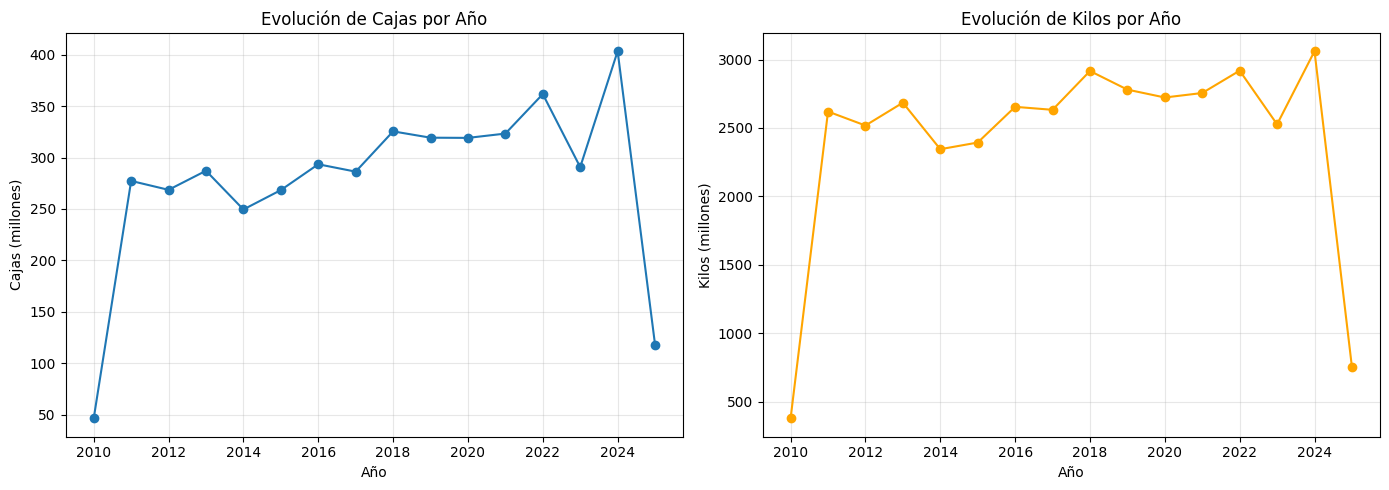

In [9]:
# Visualización básica de la serie temporal
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Convertir a pandas para visualización (solo para plotting)
ts_pd = ts_total.to_pandas()

ax1.plot(ts_pd["year"], ts_pd["boxes"] / 1e6, marker="o")
ax1.set_xlabel("Año")
ax1.set_ylabel("Cajas (millones)")
ax1.set_title("Evolución de Cajas por Año")
ax1.grid(True, alpha=0.3)

ax2.plot(ts_pd["year"], ts_pd["net_weight_kg"] / 1e6, marker="o", color="orange")
ax2.set_xlabel("Año")
ax2.set_ylabel("Kilos (millones)")
ax2.set_title("Evolución de Kilos por Año")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## 7. Ejemplo: Análisis por País


In [10]:
# Análisis para un país específico
from analysis import (
    filter_by_country,
    get_total_by_country,
    top_products_by_country,
    time_series_by_country,
)

country = "USA"  # Cambiar por cualquier país de la lista

# Totales del país
totals = get_total_by_country(df, country)
print(f"Totales para {country}:")
print(f"  Cajas: {totals['boxes']:,}")
print(f"  Kilos: {totals['kilos']:,.2f}")
print(f"  Filas: {totals['rows']:,}")

# Top productos del país
print(f"\nTop 5 productos exportados a {country}:")
top_prod_country = top_products_by_country(df, country, n=5)
print(top_prod_country)

# Serie temporal del país
ts_country = time_series_by_country(df, country)
print(f"\nSerie temporal para {country}:")
print(ts_country)


Totales para USA:
  Cajas: 0
  Kilos: 0.00
  Filas: 0

Top 5 productos exportados a USA:
shape: (0, 3)
┌─────────┬───────┬───────────────┐
│ product ┆ boxes ┆ net_weight_kg │
│ ---     ┆ ---   ┆ ---           │
│ str     ┆ i64   ┆ f64           │
╞═════════╪═══════╪═══════════════╡
└─────────┴───────┴───────────────┘

Serie temporal para USA:
shape: (0, 3)
┌──────┬───────┬───────────────┐
│ year ┆ boxes ┆ net_weight_kg │
│ ---  ┆ ---   ┆ ---           │
│ i64  ┆ i64   ┆ f64           │
╞══════╪═══════╪═══════════════╡
└──────┴───────┴───────────────┘


## 8. Head y Tail del Dataset


In [11]:
print("Primeras 10 filas:")
df.head(10)


Primeras 10 filas:


season,week,year,country,product,exporter,port_destination,boxes,net_weight_kg
str,i64,i64,str,str,str,str,i64,f64
"""2010-2011""",35,2010,"""CANADA""","""Kiwifruit""","""Copefrut S.A.""","""Toronto""",2240,22400.0
"""2010-2011""",35,2010,"""CANADA""","""Mandarins""","""Desarr.Agrario""","""Vancouver""",4200,63000.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Exp.Subsole""","""Toronto""",2920,43800.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Lo Garces Ltda.""","""Toronto""",4226,63390.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Lo Garces Ltda.""","""Toronto""",54,810.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Lo Garces Ltda.""","""Toronto""",144,2160.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Lo Garces Ltda.""","""Toronto""",76,1140.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Exp.San Clemente S.A""","""Toronto""",3184,47760.0
"""2010-2011""",35,2010,"""CANADA""","""Oranges""","""Exp.San Clemente S.A""","""Toronto""",16,240.0


In [12]:
print("Últimas 10 filas:")
df.tail(10)


Últimas 10 filas:


season,week,year,country,product,exporter,port_destination,boxes,net_weight_kg
str,i64,i64,str,str,str,str,i64,f64
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Agric El Cerrito S.A""","""Filadelfia""",1600,13120.0
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Agric El Cerrito S.A""","""Filadelfia""",90,738.0
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Agric El Cerrito S.A""","""Filadelfia""",846,6937.0
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Agric El Cerrito S.A""","""Filadelfia""",918,7528.0
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Exp.Subsole""","""Wilmington D.""",640,5248.0
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Exp.Subsole""","""Wilmington D.""",960,7872.0
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Fruta Austral""","""New Jersey""",255,2321.0
"""2024-2025""",10,2025,"""U.S.A.""","""Table Grape""","""Fruta Austral""","""New Jersey""",1625,13555.0
"""2024-2025""",10,2025,"""U.S.A.""","""Apples""","""Verfrut Spa""","""Filadelfia""",2352,42807.0


In [14]:
# Estadísticas descriptivas y variabilidad de columnas
print('Tipos de datos:')
print(df.dtypes)
print('\nValores nulos por columna:')
print(df.null_count())
print('\nEstadísticas descriptivas:')
print(df.describe())
print('\nDesviación estándar de columnas numéricas:')
# Polars: seleccionar columnas numéricas y calcular std
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if 'int' in str(dtype).lower() or 'float' in str(dtype).lower()]
print(df.select(numeric_cols).std())
print('\nNúmero de valores únicos por columna:')
print(df.n_unique())

Tipos de datos:
[String, Int64, Int64, String, String, String, String, Int64, Float64]

Valores nulos por columna:
shape: (1, 9)
┌────────┬──────┬──────┬─────────┬───┬──────────┬──────────────────┬───────┬───────────────┐
│ season ┆ week ┆ year ┆ country ┆ … ┆ exporter ┆ port_destination ┆ boxes ┆ net_weight_kg │
│ ---    ┆ ---  ┆ ---  ┆ ---     ┆   ┆ ---      ┆ ---              ┆ ---   ┆ ---           │
│ u32    ┆ u32  ┆ u32  ┆ u32     ┆   ┆ u32      ┆ u32              ┆ u32   ┆ u32           │
╞════════╪══════╪══════╪═════════╪═══╪══════════╪══════════════════╪═══════╪═══════════════╡
│ 0      ┆ 0    ┆ 0    ┆ 0       ┆ … ┆ 0        ┆ 0                ┆ 0     ┆ 0             │
└────────┴──────┴──────┴─────────┴───┴──────────┴──────────────────┴───────┴───────────────┘

Estadísticas descriptivas:
shape: (9, 10)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ statistic ┆ season    ┆ week      ┆ year      ┆ … ┆ exporter  ┆ port_dest 

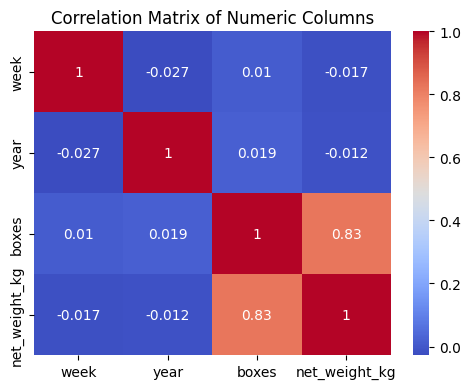

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to pandas for correlation and plotting
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if 'int' in str(dtype).lower() or 'float' in str(dtype).lower()]
df_pd = df.select(numeric_cols).to_pandas()
corr = df_pd.corr()

plt.figure(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Columns')
plt.tight_layout()
plt.show()

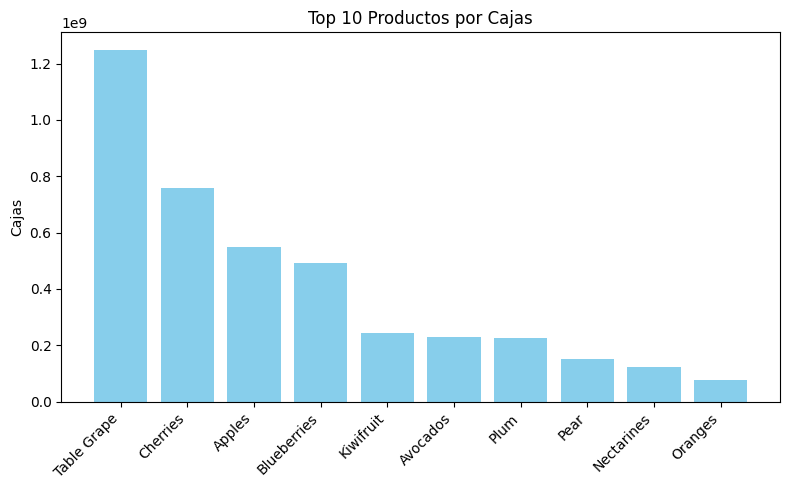

In [16]:
# Bar chart for Top 10 Products by Boxes
import matplotlib.pyplot as plt

top_prod_pd = top_prod.to_pandas()
plt.figure(figsize=(8,5))
plt.bar(top_prod_pd['product'], top_prod_pd['boxes'], color='skyblue')
plt.ylabel('Cajas')
plt.title('Top 10 Productos por Cajas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

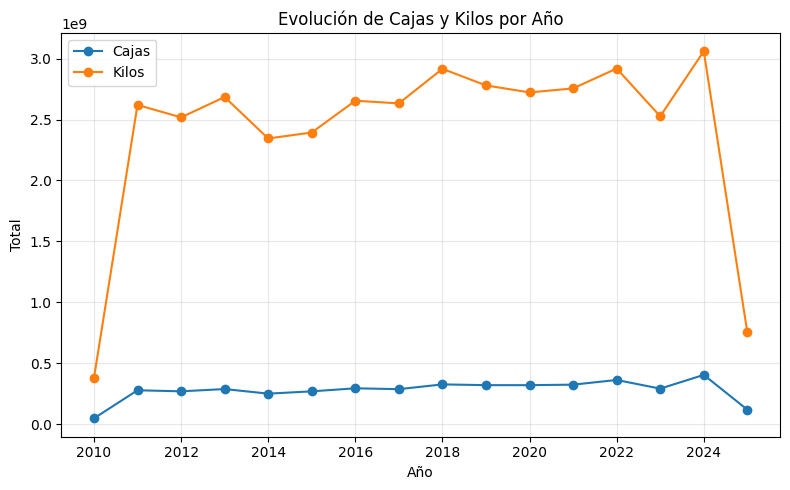

In [17]:
# Line chart for total boxes and kilos by year
import matplotlib.pyplot as plt

ts_pd = ts_total.to_pandas()
plt.figure(figsize=(8,5))
plt.plot(ts_pd['year'], ts_pd['boxes'], marker='o', label='Cajas')
plt.plot(ts_pd['year'], ts_pd['net_weight_kg'], marker='o', label='Kilos')
plt.xlabel('Año')
plt.ylabel('Total')
plt.title('Evolución de Cajas y Kilos por Año')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

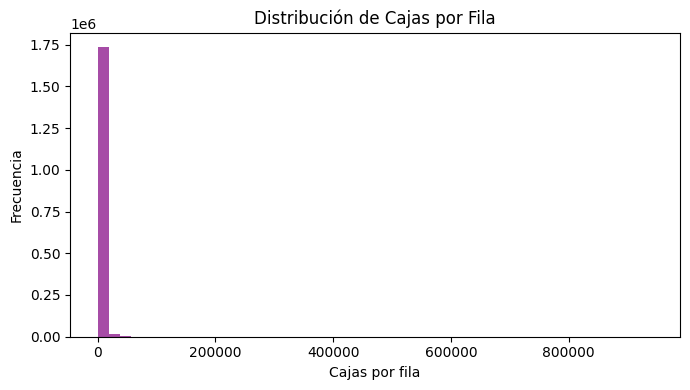

In [18]:
# Histograma de la distribución de cajas por fila
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(df_pd['boxes'], bins=50, color='purple', alpha=0.7)
plt.xlabel('Cajas por fila')
plt.ylabel('Frecuencia')
plt.title('Distribución de Cajas por Fila')
plt.tight_layout()
plt.show()

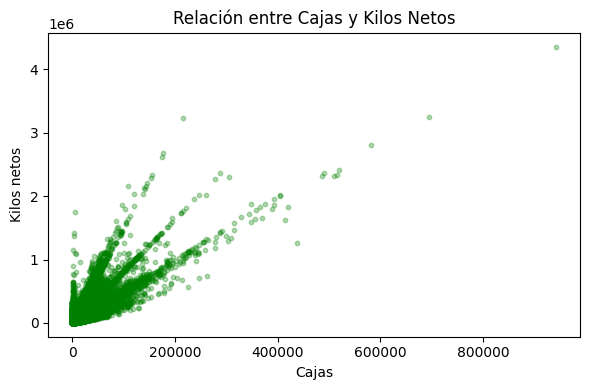

In [19]:
# Scatter plot for relationship between boxes and net_weight_kg
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(df_pd['boxes'], df_pd['net_weight_kg'], alpha=0.3, s=10, color='green')
plt.xlabel('Cajas')
plt.ylabel('Kilos netos')
plt.title('Relación entre Cajas y Kilos Netos')
plt.tight_layout()
plt.show()

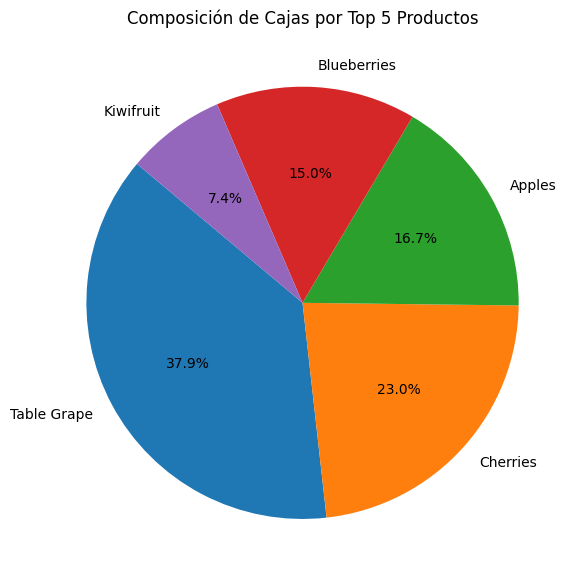

In [20]:
# Pie chart for composition of total boxes by top 5 products
import matplotlib.pyplot as plt

top5_prod = top_prod_pd.head(5)
plt.figure(figsize=(6,6))
plt.pie(top5_prod['boxes'], labels=top5_prod['product'], autopct='%1.1f%%', startangle=140)
plt.title('Composición de Cajas por Top 5 Productos')
plt.tight_layout()
plt.show()

In [ ]:
%pip install plotly

In [23]:
# TreeMap for boxes by country and product
import plotly.express as px

df_pd = df.to_pandas()
fig = px.treemap(df_pd, path=['country', 'product'], values='boxes',
                 title='TreeMap: Cajas por País y Producto')
# Usar renderer explícito 'browser' para evitar problemas con nbformat
fig.show(renderer='browser')

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed